# **1. Perkenalan Dataset**


Pada tahap awal penelitian ini, dilakukan perkenalan terhadap dataset yang digunakan sebagai dasar pengembangan sistem machine learning. Dataset yang digunakan berjudul **"Extrovert vs. Introvert Behavior Data"**, yang berisi data terstruktur mengenai perilaku sosial individu dalam kehidupan sehari-hari.

Dataset ini dirancang untuk merepresentasikan pola interaksi sosial dan kebiasaan individu dalam bentuk numerik dan kategorikal. Informasi tersebut memungkinkan analisis lebih lanjut terkait kecenderungan kepribadian seseorang, khususnya dalam konteks klasifikasi antara individu dengan tipe kepribadian **Extrovert** dan **Introvert**.

Setiap baris data merepresentasikan satu individu, sementara kolom-kolom yang tersedia menggambarkan berbagai aspek perilaku sosial, baik yang berkaitan dengan aktivitas di lingkungan sosial maupun respons individu terhadap interaksi tersebut. Label kepribadian disediakan sebagai variabel target yang digunakan dalam proses pembelajaran model.

## Fitur dalam Dataset

Adapun fitur-fitur yang tersedia dalam dataset ini meliputi:

- **Time_spent_Alone**  
  Menunjukkan jumlah waktu (dalam jam) yang dihabiskan individu untuk beraktivitas sendiri setiap hari, dengan rentang nilai antara 0 hingga 11 jam.

- **Stage_fear**  
  Merepresentasikan kondisi apakah individu memiliki rasa takut untuk tampil atau berbicara di depan umum (Ya/Tidak).

- **Social_event_attendance**  
  Menggambarkan tingkat frekuensi individu dalam menghadiri acara sosial, dengan nilai berkisar antara 0 hingga 10.

- **Going_outside**  
  Menunjukkan seberapa sering individu keluar rumah dalam satu minggu, dengan rentang nilai 0 hingga 7.

- **Drained_after_socializing**  
  Menyatakan apakah individu merasa lelah setelah melakukan aktivitas sosial (Ya/Tidak).

- **Friends_circle_size**  
  Menggambarkan jumlah teman dekat yang dimiliki individu, dengan rentang nilai antara 0 hingga 15.

- **Post_frequency**  
  Menunjukkan intensitas individu dalam memposting konten di media sosial, dengan nilai berkisar antara 0 hingga 10.

- **Personality**  
  Merupakan variabel target yang menunjukkan tipe kepribadian individu, yaitu **Extrovert** atau **Introvert**.

Secara umum, dataset ini relevan untuk digunakan dalam penelitian dan pengembangan sistem machine learning, khususnya pada tugas klasifikasi berbasis perilaku sosial. Dataset ini dapat diakses secara terbuka melalui platform Kaggle pada tautan berikut:

https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../personality_dataset.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.2 Melihat Sampel Data
Langkah awal EDA dilakukan dengan menampilkan beberapa baris pertama dari dataset untuk memahami struktur data dan jenis nilai pada setiap kolom.

In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## 4.3 Ukuran Dataset

Selanjutnya, dilakukan pengecekan jumlah baris dan kolom untuk mengetahui skala dataset yang digunakan.

In [4]:
df.shape

(2900, 8)

## 4.4 Statistik Deskriptif Fitur Numerik

Statistik deskriptif digunakan untuk melihat gambaran umum fitur numerik, seperti nilai rata-rata, sebaran data, serta rentang nilai minimum dan maksimum.

In [5]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


## 4.5 Statistik Deskriptif Seluruh Kolom

Untuk mendapatkan informasi yang lebih lengkap, termasuk fitur kategorikal, digunakan statistik deskriptif dengan menyertakan seluruh kolom.

In [6]:
df.describe(include='all')

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2837.000000,2827,2838.000000,2834.000000,2848,2823.000000,2835.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1417,NaN,NaN,1441,NaN,NaN,1491
mean,4.505816,NaN,3.963354,3.000000,NaN,6.268863,3.564727,NaN
std,3.479192,NaN,2.903827,2.247327,NaN,4.289693,2.926582,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
75%,8.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


## 4.6 Informasi Struktur Data dan Missing Values

Pemeriksaan struktur data dilakukan untuk mengetahui tipe data setiap kolom serta jumlah data yang tidak lengkap (missing values).

In [7]:
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None

Missing values per column:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality            

### Insight Struktur Data dan Missing Values

Berdasarkan hasil pemeriksaan struktur dataset menggunakan `df.info()` dan analisis missing values, diperoleh beberapa insight penting terkait kualitas dan kesiapan data untuk tahap pemodelan.

#### 1. Struktur dan Tipe Data

Dataset terdiri dari **2.900 baris** dan **8 kolom**, yang mencakup kombinasi fitur numerik dan kategorikal. Sebanyak **5 kolom bertipe numerik (float64)** dan **3 kolom bertipe kategorikal (object)**. Komposisi ini menunjukkan bahwa dataset memiliki karakteristik campuran (*mixed-type data*), sehingga pada tahap preprocessing diperlukan penanganan yang berbeda untuk setiap tipe data, seperti normalisasi untuk fitur numerik dan encoding untuk fitur kategorikal.

Variabel target **Personality** bertipe kategorikal dan tidak memiliki nilai yang hilang, sehingga dapat digunakan secara langsung sebagai label dalam proses supervised learning.

#### 2. Konsistensi dan Kelengkapan Data

Hasil analisis menunjukkan bahwa seluruh fitur prediktor memiliki sejumlah nilai yang hilang, dengan jumlah missing values yang bervariasi pada setiap kolom. Fitur dengan jumlah missing values terbanyak adalah **Friends_circle_size**, sedangkan fitur dengan jumlah missing values paling sedikit adalah **Drained_after_socializing**.

Meskipun demikian, proporsi missing values pada masing-masing fitur relatif kecil dibandingkan total jumlah data, sehingga dataset masih tergolong layak untuk digunakan tanpa perlu penghapusan data dalam skala besar. Hal ini membuka peluang untuk menerapkan teknik imputasi data tanpa kehilangan informasi yang signifikan.

#### 3. Implikasi terhadap Preprocessing

Keberadaan missing values pada hampir seluruh fitur mengindikasikan bahwa tahap preprocessing menjadi krusial sebelum proses pelatihan model dilakukan. Beberapa implikasi yang dapat ditarik antara lain:

- Diperlukan strategi imputasi yang sesuai untuk fitur numerik dan kategorikal.
- Penghapusan baris data secara langsung tidak direkomendasikan karena dapat mengurangi jumlah data pelatihan.
- Konsistensi data antar fitur perlu dijaga agar model tidak bias akibat pola missing values tertentu.

#### 4. Kesiapan Dataset untuk Pemodelan

Secara keseluruhan, dataset memiliki struktur yang jelas, ukuran yang memadai, dan variabel target yang lengkap. Meskipun terdapat nilai yang hilang pada fitur prediktor, jumlahnya masih dalam batas yang dapat ditangani melalui preprocessing. Dengan penanganan data yang tepat, dataset ini memiliki potensi yang baik untuk digunakan dalam pengembangan model klasifikasi kepribadian berbasis machine learning.

Insight ini menjadi dasar dalam menentukan langkah-langkah preprocessing pada tahap selanjutnya, seperti imputasi nilai hilang, transformasi fitur, dan encoding data kategorikal.


## 4.7 Analisis Univariate

### 4.7.1 Distribusi Fitur Numerik

Analisis univariate dilakukan untuk memahami distribusi masing-masing fitur numerik secara individual.

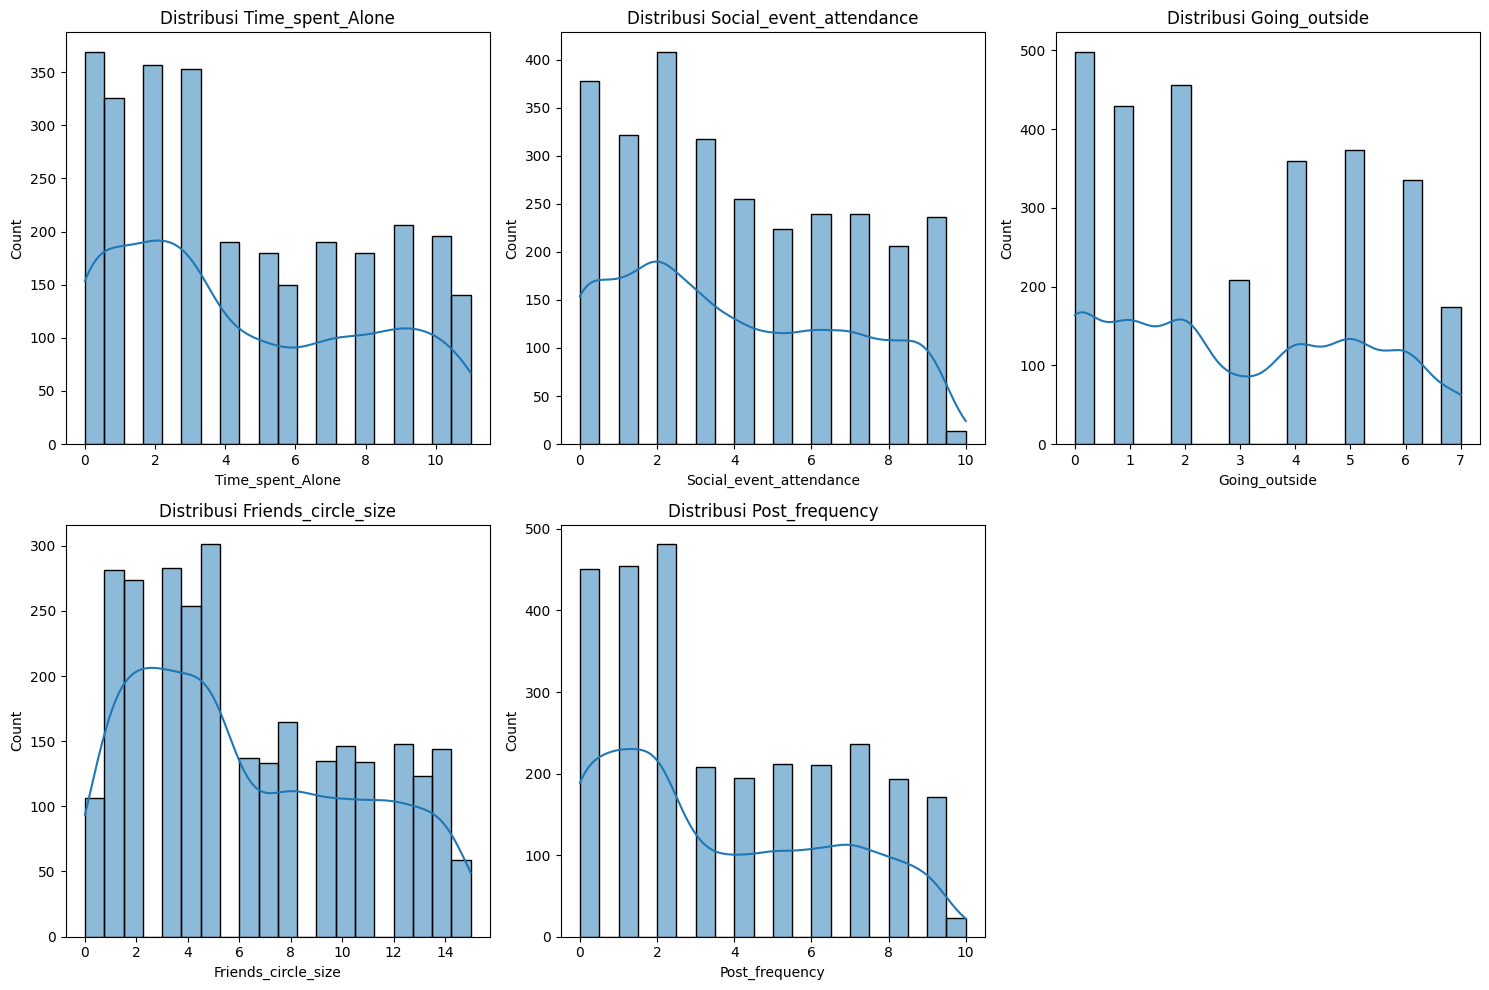

In [8]:
num_cols = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

### 4.7.2 Distribusi Fitur Kategorikal

Distribusi fitur kategorikal dianalisis untuk melihat proporsi setiap kategori dalam dataset.

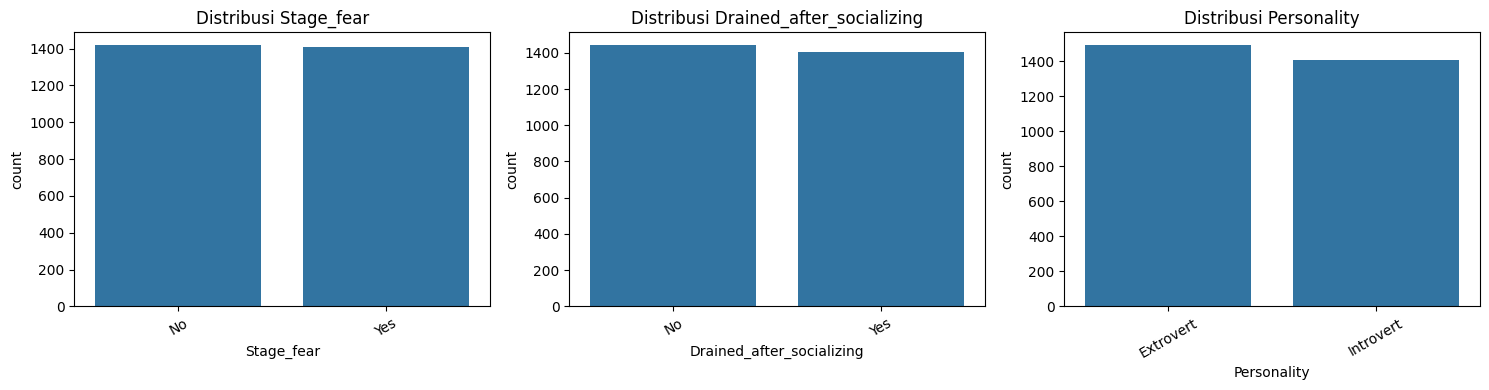

In [9]:
cat_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

plt.figure(figsize=(15, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## 4.8 Analisis Multivariate

### 4.8.1 Korelasi Antar Fitur Numerik
Analisis korelasi dilakukan untuk mengidentifikasi hubungan linear antar fitur numerik.

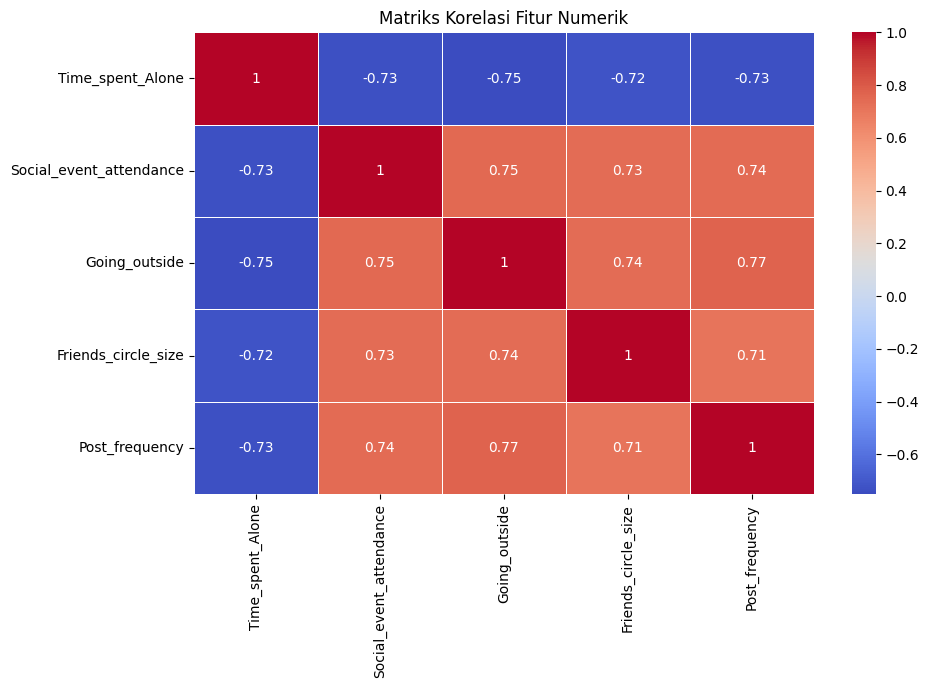

In [10]:
plt.figure(figsize=(10, 6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()


Hasil korelasi digunakan untuk mengetahui apakah terdapat fitur yang saling berkorelasi tinggi dan berpotensi menimbulkan redundansi.

### 4.7.2 Hubungan Fitur Numerik dengan Variabel Target

Distribusi fitur numerik terhadap kelas target dianalisis menggunakan boxplot.

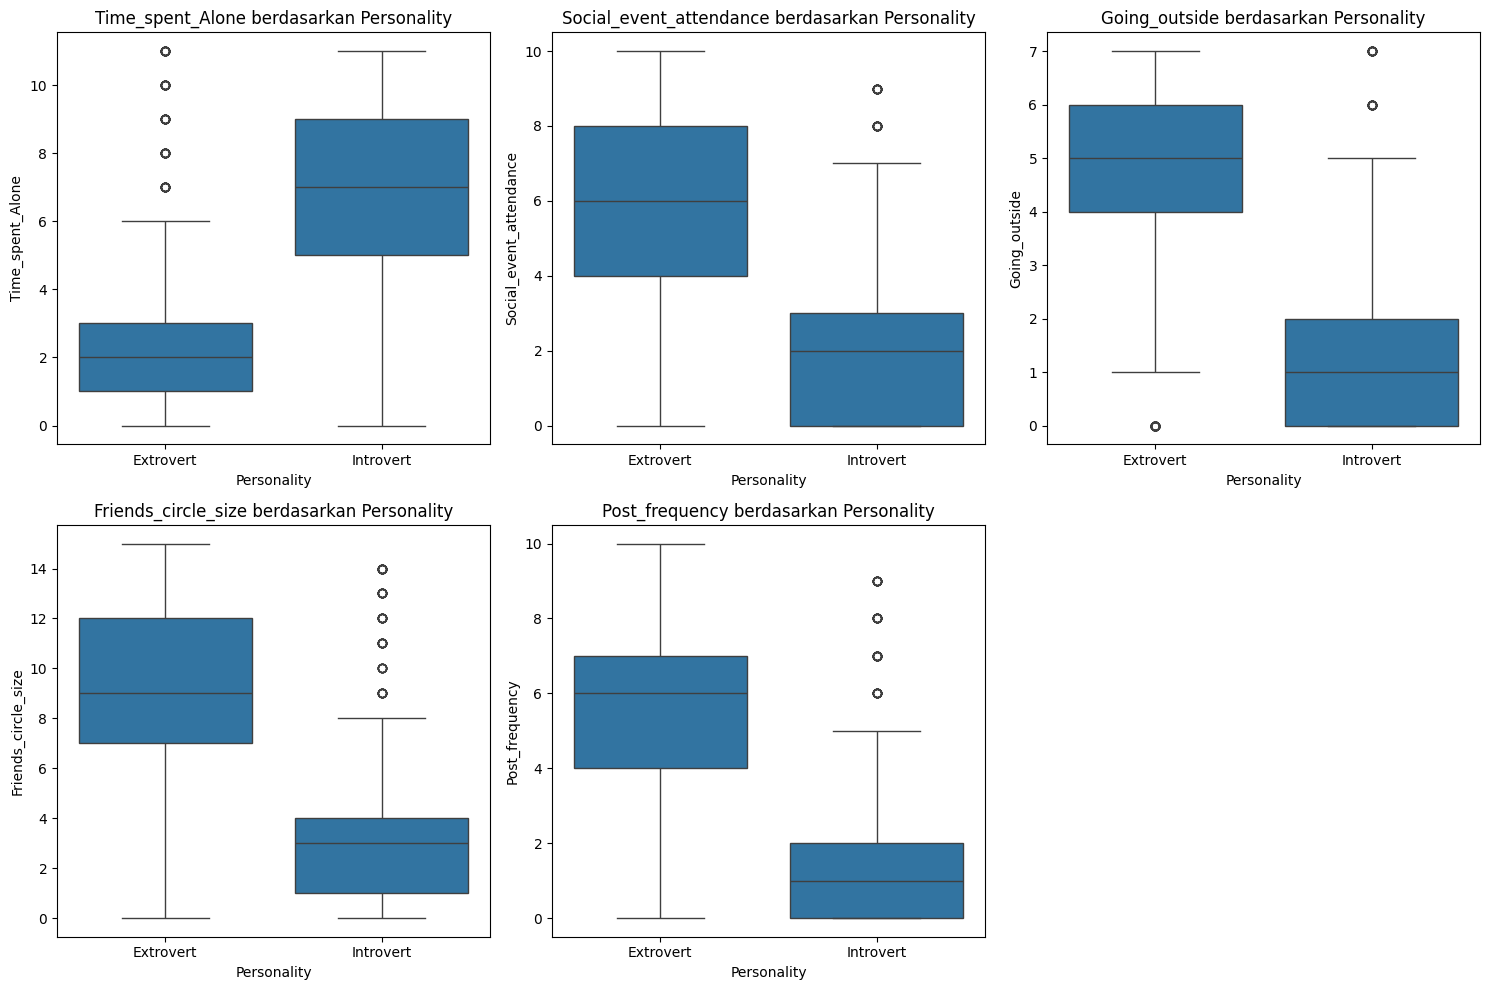

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Personality', y=col, data=df)
    plt.title(f'{col} berdasarkan Personality')
plt.tight_layout()
plt.show()


Visualisasi ini membantu mengidentifikasi perbedaan pola perilaku numerik antara individu extrovert dan introvert.

### 4.8.3 Scatterplot dan Pairwise Relationship

Hubungan antar fitur numerik juga dianalisis secara pairwise dengan mempertimbangkan variabel target.

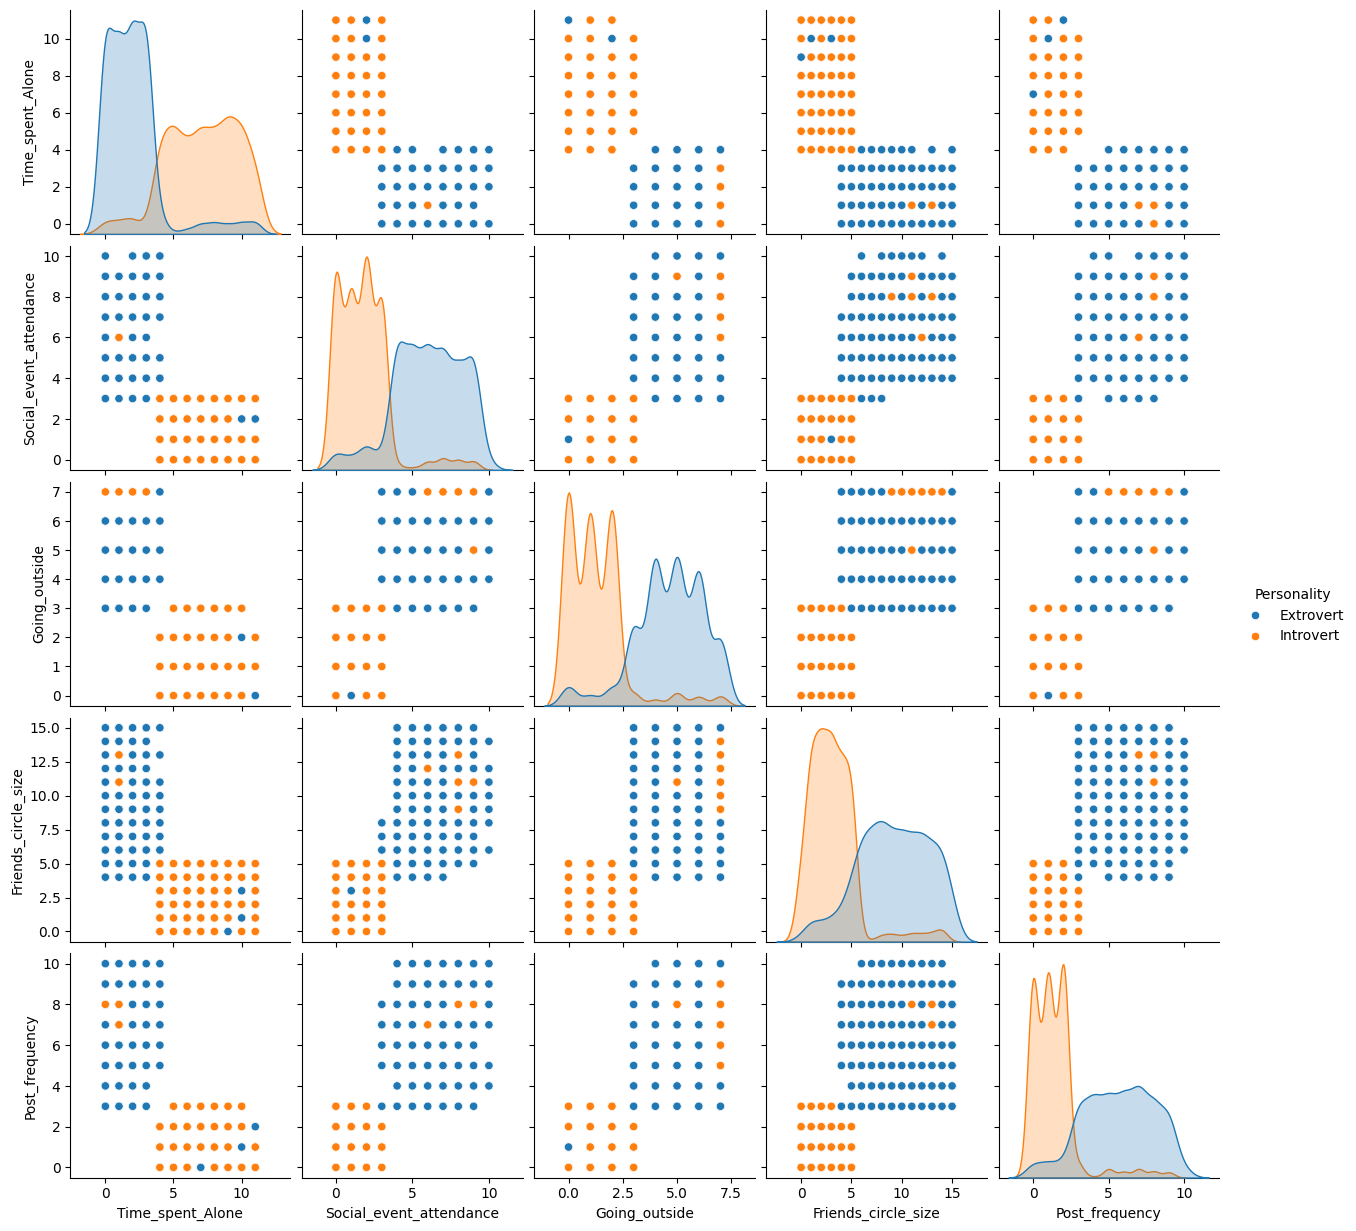

In [12]:
sns.pairplot(
    df[num_cols + ['Personality']],
    hue='Personality'
)
plt.show()


## 4.9 Analisis Fitur Kategorikal terhadap Target

Untuk memahami pengaruh fitur kategorikal terhadap tipe kepribadian, dilakukan analisis tabulasi silang.

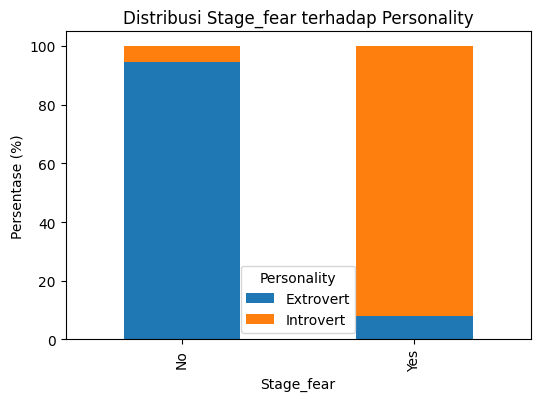

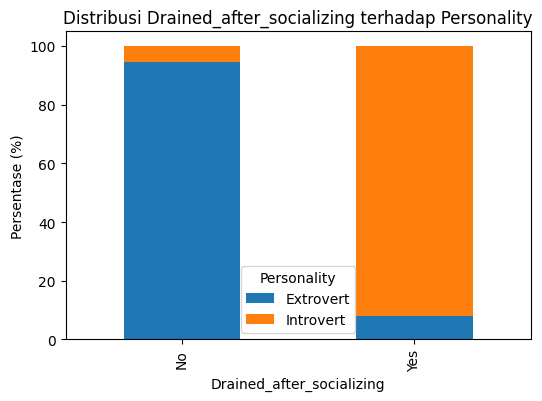

In [13]:
for col in ['Stage_fear', 'Drained_after_socializing']:
    ct = pd.crosstab(df[col], df['Personality'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, figsize=(6, 4))
    plt.ylabel('Persentase (%)')
    plt.title(f'Distribusi {col} terhadap Personality')
    plt.legend(title='Personality')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### 5.1 Penanganan Missing Values

Berdasarkan hasil Exploratory Data Analysis (EDA), diketahui bahwa beberapa fitur memiliki nilai yang hilang. Mengingat proporsi missing values relatif kecil dibandingkan total jumlah data, strategi yang digunakan adalah menghapus baris data yang mengandung nilai kosong. Pendekatan ini dipilih untuk menjaga konsistensi data dan menghindari potensi bias akibat imputasi yang kurang representatif.


In [14]:
df_clean = df.dropna()
print("Ukuran data setelah menghapus missing values:", df_clean.shape)


Ukuran data setelah menghapus missing values: (2477, 8)


### 5.2 Penghapusan Data Duplikat

Data duplikat dapat menyebabkan model mempelajari pola yang berulang dan tidak mencerminkan kondisi data sebenarnya. Oleh karena itu, langkah selanjutnya adalah menghapus baris data yang terduplikasi agar setiap observasi bersifat unik.


In [15]:
df_clean = df_clean.drop_duplicates()
print("Ukuran data setelah menghapus data duplikat:", df_clean.shape)


Ukuran data setelah menghapus data duplikat: (2098, 8)


### 5.3 Normalisasi Fitur Numerik

Fitur numerik pada dataset memiliki rentang nilai yang berbeda-beda. Perbedaan skala ini dapat memengaruhi performa algoritma machine learning tertentu, terutama algoritma berbasis jarak dan optimasi gradien.

Untuk mengatasi permasalahan tersebut, dilakukan normalisasi menggunakan metode Min-Max Scaling sehingga seluruh fitur numerik berada pada rentang nilai 0 hingga 1.


In [16]:
num_cols = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

scaler = MinMaxScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

### 5.4 Deteksi dan Penanganan Outlier

Outlier merupakan nilai ekstrem yang dapat memengaruhi proses pembelajaran model dan menyebabkan model menjadi kurang stabil. Pada penelitian ini, deteksi outlier dilakukan menggunakan metode Interquartile Range (IQR).

Nilai yang berada di luar batas bawah dan atas IQR akan dihapus untuk menjaga distribusi data tetap representatif.


In [17]:
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df_clean[
        (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)
    ]

print("Ukuran data setelah penanganan outlier:", df_clean.shape)

Ukuran data setelah penanganan outlier: (2098, 8)


### 5.5 Encoding Data Kategorikal

Algoritma machine learning umumnya tidak dapat memproses data kategorikal dalam bentuk teks. Oleh karena itu, fitur kategorikal perlu dikonversi ke dalam representasi numerik.

Pada tahap ini digunakan metode Label Encoding karena fitur kategorikal bersifat biner dan tidak memiliki banyak kategori. Metode ini juga diterapkan pada variabel target agar dapat digunakan sebagai label kelas.


In [18]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [
    'Stage_fear',
    'Drained_after_socializing',
    'Personality'
]

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le


### 5.6 Binning (Pengelompokan Data)

Binning dilakukan untuk mengelompokkan nilai numerik ke dalam kategori tertentu guna menyederhanakan representasi data dan mengurangi sensitivitas terhadap fluktuasi kecil pada nilai numerik.

Pada penelitian ini, binning diterapkan pada fitur *Time_spent_Alone* dengan membagi nilai menjadi tiga kategori, yaitu rendah, sedang, dan tinggi.


In [19]:
# 6. Binning numerik (AMAN untuk modelling)
df_clean['Time_spent_Alone_Bin'] = pd.cut(
    df_clean['Time_spent_Alone'],
    bins=3,
    labels=False
)


### 5.7 Hasil Akhir Data Setelah Preprocessing

Setelah seluruh tahapan preprocessing dilakukan, dataset berada dalam kondisi bersih, terstruktur, dan siap digunakan untuk proses pelatihan model machine learning. Seluruh fitur telah berada dalam format numerik yang konsisten, tanpa nilai kosong, data duplikat, maupun outlier ekstrem.


In [20]:
print(df_clean.head())

   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0          0.363636           0                      0.4       0.857143   
1          0.818182           1                      0.0       0.000000   
2          0.818182           1                      0.1       0.285714   
3          0.000000           0                      0.6       1.000000   
4          0.272727           0                      0.9       0.571429   

   Drained_after_socializing  Friends_circle_size  Post_frequency  \
0                          0             0.866667             0.5   
1                          1             0.000000             0.3   
2                          1             0.333333             0.2   
3                          0             0.933333             0.8   
4                          0             0.533333             0.5   

   Personality  Time_spent_Alone_Bin  
0            0                     1  
1            1                     2  
2            1   

### 5.8 Penyimpanan Dataset Hasil Preprocessing

Dataset hasil preprocessing disimpan dalam format CSV untuk digunakan pada tahap pemodelan dan evaluasi model machine learning.


In [21]:
df_clean.to_csv('personality_preprocessing_dataset.csv', index=False)
print("Data berhasil disimpan sebagai 'personality_preprocessing_dataset.csv'")


Data berhasil disimpan sebagai 'personality_preprocessing_dataset.csv'


### 5.9 Ringkasan Tahap Preprocessing

Tahap data preprocessing menghasilkan dataset yang:
- Bebas dari nilai kosong dan data duplikat
- Memiliki fitur numerik dengan skala yang seragam
- Telah dilakukan penanganan outlier
- Mengonversi fitur kategorikal ke bentuk numerik
- Menyediakan fitur tambahan hasil binning

Dataset ini siap digunakan pada tahap selanjutnya, yaitu pelatihan dan evaluasi model machine learning.
